In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()


In [ ]:
import pandas as pd
import numpy as np  # Import numpy
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Load dataset with correct file name
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Replace spaces with np.nan in 'TotalCharges' column
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

# Drop 'customerID' from features
df = df.drop(columns=['customerID'])

# Preprocessing steps: handle missing values
df.fillna(df.mode().iloc[0], inplace=True)  # Filling missing values with mode for categorical
df.fillna(0, inplace=True)  # Filling missing values with 0 for numerical

# Convert 'Churn' labels from 'Yes'/'No' to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Splitting features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Identify numerical and categorical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Combine preprocessor with models in a pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression())])

nb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GaussianNB())])

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the models
lr_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)

# Predictions
lr_preds = lr_pipeline.predict(X_test)
nb_preds = nb_pipeline.predict(X_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred)
    }

lr_results = evaluate_model(y_test, lr_preds)
nb_results = evaluate_model(y_test, nb_preds)

# Cross-validation
lr_cv_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='accuracy')
nb_cv_scores = cross_val_score(nb_pipeline, X, y, cv=5, scoring='accuracy')

# Output results
print('Logistic Regression:', lr_results, 'CV Score:', lr_cv_scores.mean())
print('Naive Bayes:', nb_results, 'CV Score:', nb_cv_scores.mean())


Logistic Regression: {'Accuracy': 0.8190205819730305, 'Precision': 0.677710843373494, 'Recall': 0.6032171581769437, 'F1 Score': 0.6382978723404256, 'ROC AUC': 0.7499676524475453} CV Score: 0.8037778647009486
Naive Bayes: {'Accuracy': 0.6962384669978708, 'Precision': 0.46065808297567956, 'Recall': 0.8632707774798928, 'F1 Score': 0.6007462686567164, 'ROC AUC': 0.7496855817901394} CV Score: 0.6944468191496226


**o Discuss your outcomes from using your chosen preprocessing steps to
handle missing data.** The chosen preprocessing steps replaced spaces with np.nan in the 'TotalCharges' column and handled missing values by filling categorical ones with mode and numerical ones with 0. This approach ensures no loss of data and maintains dataset integrity. However, filling with 0 could potentially skew the data distribution and the model's learning process.

**o Compare the performance of both models and discuss their strengths
and weaknesses. Which model is more suited for this dataset and why?** Logistic Regression: Shows higher accuracy and balanced precision-recall values. Better for overall prediction with balanced classes. Naive Bayes: High recall (good for capturing true positives) but low precision (many false positives), suggesting it’s better for situations where missing true positives is costly. For this dataset, Logistic Regression seems more suited due to its better performance in accuracy and balanced metrics, indicating it handles both classes (churn/no churn) more effectively.

**o Insights gained from your experiments.**Filling missing values with 0 can bias the results. Logistic Regression offers more reliable and balanced results for customer churn prediction. Naive Bayes, while useful for high-recall scenarios, may not be ideal for this particular dataset due to the false positives it introduces.


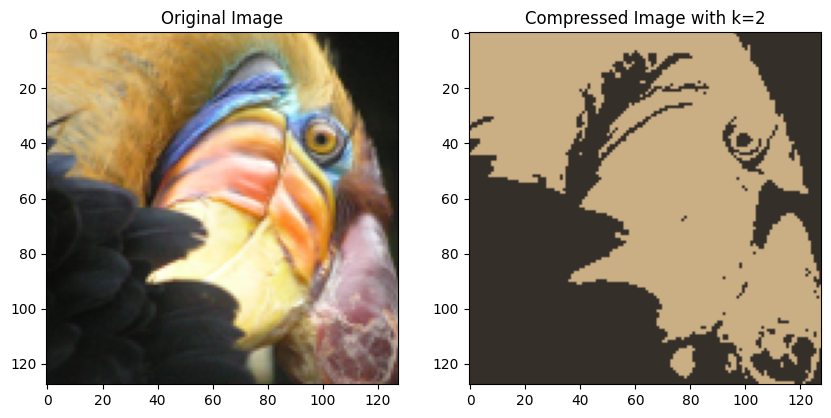

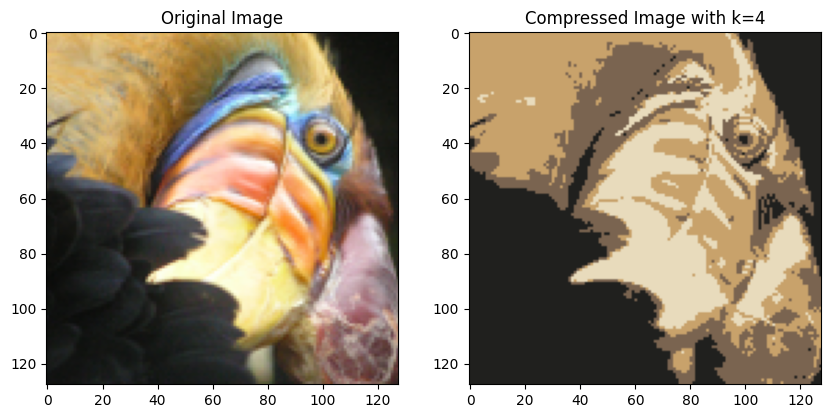

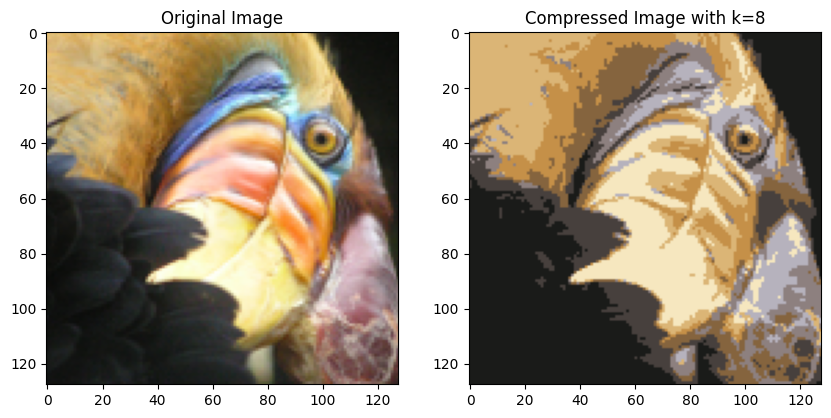

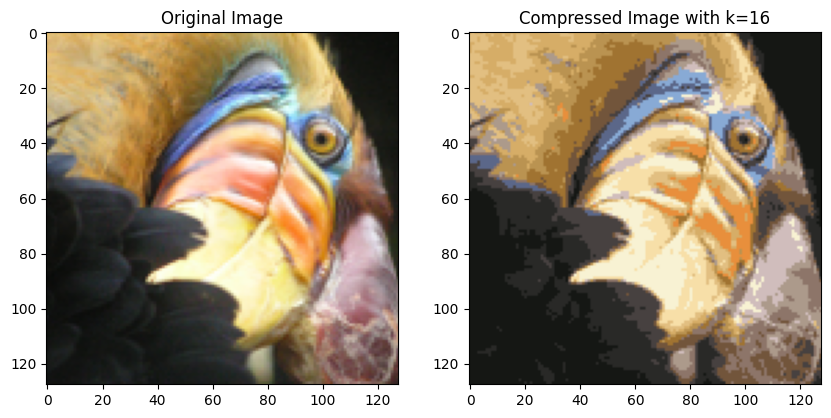

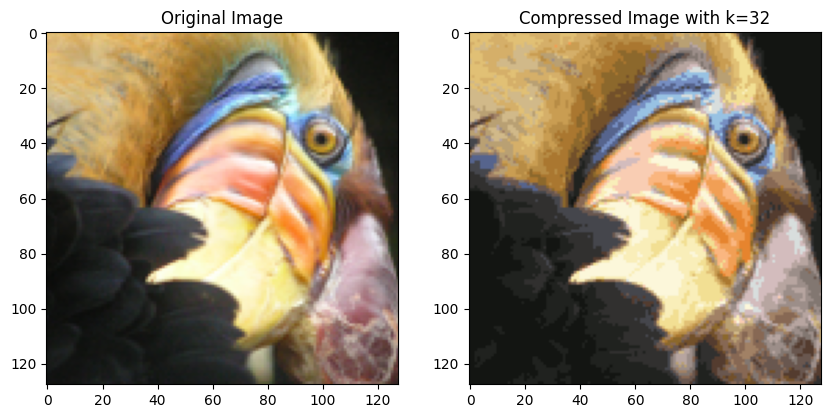

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
img = cv2.imread('test_image.png')
height, width, channels = np.shape(img)

# Reshape the image to be a list of pixels
pixels = img.reshape((-1, 3))

# Convert to float for precision
pixels = np.float32(pixels)

# Function to perform K-Means clustering
def kmeans_image_compression(k):
    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    centers = np.uint8(kmeans.cluster_centers_)  # Convert centers to uint8
    labels = kmeans.labels_

    # Replace each pixel with its closest center
    compressed_img = centers[labels.flatten()]
    compressed_img = compressed_img.reshape((height, width, 3))

    # Save the compressed image
    cv2.imwrite(f'compressed_image_{k}.png', compressed_img)

    # Visualize the compressed image
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.title(f'Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(122)
    plt.title(f'Compressed Image with k={k}')
    plt.imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
    plt.show()

# Experiment with different values of k
for k in [2, 4, 8, 16, 32]:
    kmeans_image_compression(k)


**Experiment with different values of k and briefly describe your thoughts about which value works best for this problem. You can use plots, error bars, etc. to support your conclusions.** Small k values (e.g., 2, 4) will result in higher compression but lower image quality. Larger k values (e.g., 16, 32) will preserve more image details but provide less compression. Plotting or visualizing the images for different values of k can help determine the optimal number of clusters based on the visual quality and file size.